# project 1

__This project is mainly about data analysis and prediction based on Motorbike data. There are three chapters of the project,introduction, exploration of data analysis and prediction on selling price.__<br>
* ***Introduction***<br>
In the introduction, we view some basic information of Motorbike data set, which will help us go through next two chapters
* ***EDA***<br>
In chapter two, we are going to explore data, regarding with selling price, mainly about the relationship with other variables. We will use table, bar plot, scatter plot and box plot to explicitly show the relationship. After doing all these work, we could easily find some influence from other variable to selling price variable.
* ***Prediction***<br>
In the last chapter, we shall to using some AI algorithm like gradient descent algorithm based on constant or km_driven included in the dataset to make some prediction and check the RMSE.

## Introduction

__Import modules__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

__Import Motorbike dataset as Motor and view the first few rows__

In [ ]:
Motor = pd.read_csv("bikeDetails.csv")
Motor.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Basic information of Motor

In [ ]:
Motor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


## EDA

__In order to make the following story easier, let's change the name of the variables, and change type of three variables, like `owner`,`year`,`name`__

In [ ]:
Motor.rename(columns = {"selling_price":"s_price","seller_type":"s_type"},inplace = True)
Motor.head()

,name,s_price,year,s_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
Motor.owner = Motor.owner.astype("category")
Motor.year = Motor.year.astype("category")
Motor.name = Motor.name.astype("category")

#### EDA for category variable<br>
__we make some variable type changes above and in this subsection we focus on these variable own relationship between each other__
* number of occurrence of different variables

In [ ]:
print("Different type owner numbers")
print(Motor.owner.value_counts(),"\n")
print("Different type of seller")
print(Motor.s_type.value_counts(),"\n")
print("Different years")
print(Motor.year.value_counts())

Different type owner numbers
1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64 

Different type of seller
Individual    1055
Dealer           6
Name: s_type, dtype: int64 

Different years
2017    133
2018    131
2016    107
2015    100
2014     91
2019     86
2013     73
2012     70
2011     61
2010     60
2007     29
2008     28
2009     28
2006     20
2005     14
2000      6
2004      5
2020      3
2002      3
1998      3
2001      2
1997      2
1991      1
2003      1
1999      1
1995      1
1993      1
1988      1
Name: year, dtype: int64


* Stacked, sides by sides plots and cross table betwwen owner type and seller type

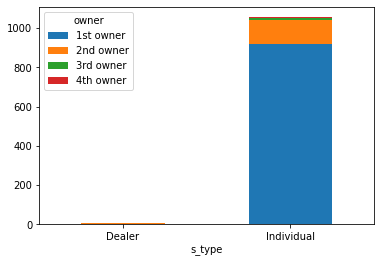

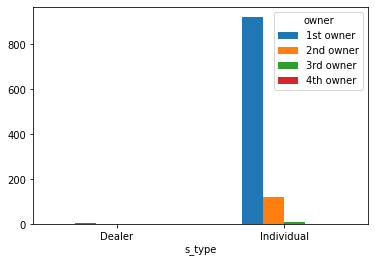

owner,1st owner,2nd owner,3rd owner,4th owner,All
s_type,,,,,
Dealer,4,2,0,0,6
Individual,920,121,11,3,1055
All,924,123,11,3,1061


In [ ]:
table = pd.crosstab(Motor.s_type,Motor.owner)
table.plot.bar(stacked = True)
plt.xticks(rotation = 0)
plt.show()
table = pd.crosstab(Motor.s_type,Motor.owner)
table.plot.bar()
plt.xticks(rotation = 0)
plt.show()
table = pd.crosstab(Motor.s_type,Motor.owner,margins = True)
table

___According to the plot and table, we could clearly see the distribution of owner and seller, in motorbike market, most seller is individual which occupy 99.4% of total seller, dealer much less than individual seller, almost none, meanwhile most owner is 1st owner, occupying 87.1%, 2nd owner only occupying 11.6%, with negligible rest owner type___<br>

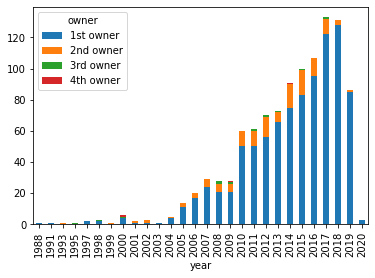

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

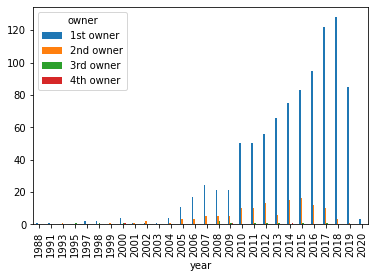

<Figure size 1440x1440 with 0 Axes>

owner,1st owner,2nd owner,3rd owner,4th owner,All
year,,,,,
1988,1,0,0,0,1
1991,1,0,0,0,1
1993,0,1,0,0,1
1995,0,0,1,0,1
1997,2,0,0,0,2
1998,2,0,1,0,3
1999,0,1,0,0,1
2000,4,0,1,1,6
2001,1,1,0,0,2


In [12]:
table = pd.crosstab(Motor.year,Motor.owner)
table.plot.bar(stacked = True)
plt.xticks(rotation = 90)
f = plt.figure()
plt.figure(figsize=(20, 20))
plt.show()
table = pd.crosstab(Motor.year,Motor.owner)
table.plot.bar()
plt.xticks(rotation = 90)
plt.figure(figsize=(20, 20))
plt.show()
table = pd.crosstab(Motor.year,Motor.owner,margins = True)
table

### EDA for numeric variables, selling price and km_driven
* Basic description and plot for `selling price`

In [18]:
print("Describe of Motor price")
print(Motor["s_price"].describe(),"\n")

Describe of Motor price
count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: s_price, dtype: float64 



C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


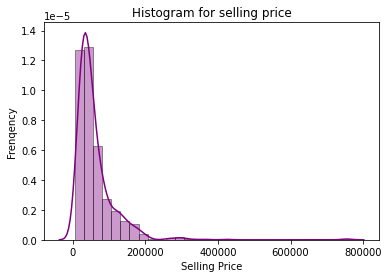

In [27]:
sns.distplot(a=Motor.s_price, bins=30, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for selling price")
plt.xlabel("Selling Price")
plt.ylabel("Frenqency")
plt.show()

Most motorbike were sold in price below 200000

Text(0, 0.5, 'Price')

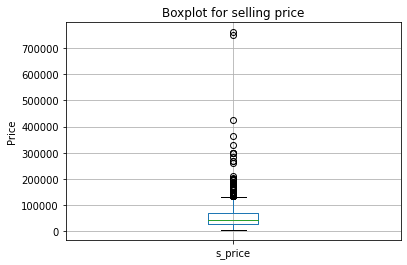

In [28]:
Motor.boxplot(column='s_price')
plt.title("Boxplot for selling price")
plt.ylabel("Price")

<AxesSubplot:xlabel='year', ylabel='s_price'>

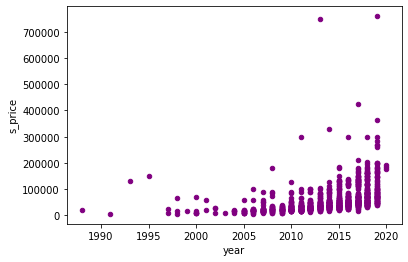

In [39]:
Motor.plot.scatter(x = "year", y = "s_price",c = "purple")

Motorbike price keep going up with time went on

* Basic description and plot for `km_driven`

In [33]:
print("Describe of Motor driven kilometer")
print(Motor["km_driven"].describe(),"\n")

Describe of Motor driven kilometer
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 



C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


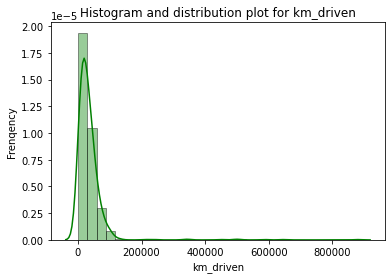

In [34]:
sns.distplot(a=Motor.km_driven, bins=30, color='green',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for km_driven")
plt.xlabel("km_driven")
plt.ylabel("Frenqency")
plt.show()

Text(0, 0.5, 'km_driven')

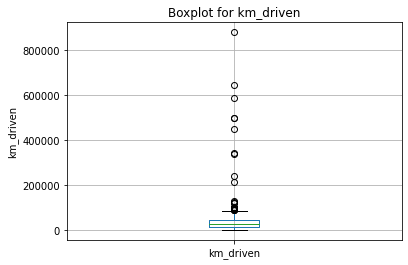

In [35]:
Motor.boxplot(column='km_driven')
plt.title("Boxplot for km_driven")
plt.ylabel("km_driven")

<AxesSubplot:xlabel='year', ylabel='s_price'>

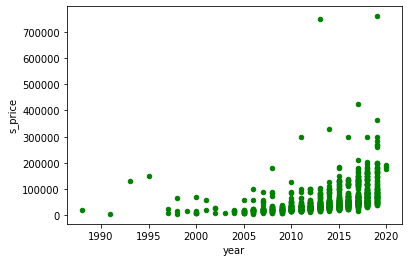

In [38]:
Motor.plot.scatter(x = "year", y = "s_price",c = "green")

* Basic description and plot for `ex_showroom_price`

In [46]:
print("Describe of ex_showroom_price")
print(Motor["ex_showroom_price"].describe(),"\n")

Describe of ex_showroom_price
count    6.260000e+02
mean     8.795871e+04
std      7.749659e+04
min      3.049000e+04
25%      5.485200e+04
50%      7.275250e+04
75%      8.703150e+04
max      1.278000e+06
Name: ex_showroom_price, dtype: float64 



C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


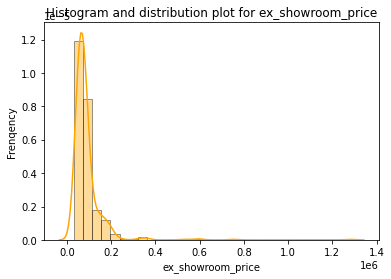

In [47]:
sns.distplot(a=Motor.ex_showroom_price, bins=30, color='orange',
             hist_kws={"edgecolor": 'black'})
plt.title("Histogram and distribution plot for ex_showroom_price")
plt.xlabel("ex_showroom_price")
plt.ylabel("Frenqency")
plt.show()

Text(0, 0.5, 'ex_showroom_price')

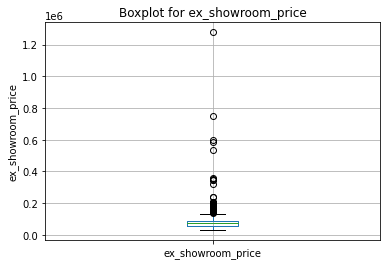

In [48]:
Motor.boxplot(column='ex_showroom_price')
plt.title("Boxplot for ex_showroom_price")
plt.ylabel("ex_showroom_price")

<AxesSubplot:xlabel='year', ylabel='ex_showroom_price'>

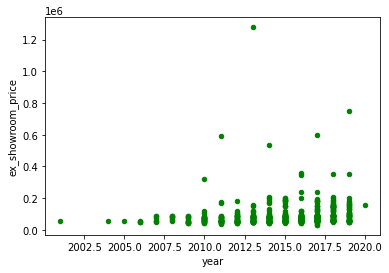

In [49]:
Motor.plot.scatter(x = "year", y = "ex_showroom_price",c = "green")

### Relationship between response variable and numeric variables

* Some relationship between `selling price` and `km_driven`

In [51]:
print("Correlation between selling price and driven kilometer\n")
print(Motor[["s_price","km_driven"]].corr())

Correlation between selling price and driven kilometer

            s_price  km_driven
s_price    1.000000  -0.212937
km_driven -0.212937   1.000000


In [52]:
no_naMotor = Motor[["s_price","km_driven"]].dropna()
slope,intercept,*_ = stats.linregress(no_naMotor.km_driven,no_naMotor.s_price)
print(intercept,slope)

67618.07212024048 -0.2322456088674644


Let's plot scatter with trend line for developing relationship explicitly via graph

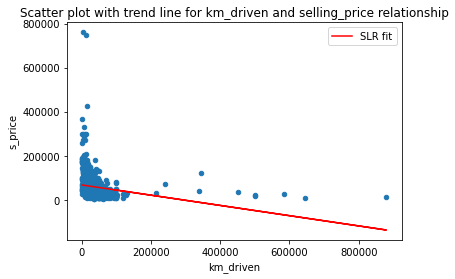

In [53]:
yhat = intercept + slope*no_naMotor.km_driven
fit = pd.DataFrame(zip(no_naMotor.km_driven,yhat))
fit.columns = ["x","yhat"]
Motor.plot.scatter(x = "km_driven",y = "s_price")
plt.plot(no_naMotor.km_driven,yhat,c = "red",label = "SLR fit")
plt.title("Scatter plot with trend line for km_driven and selling_price relationship")
plt.legend()
plt.show()

Let's see what happened for kmdrive and seller price in each year, check if they have seasonal trend

Text(0.5, 1.0, 'Mean of sellerprice and kmdrive in each years')

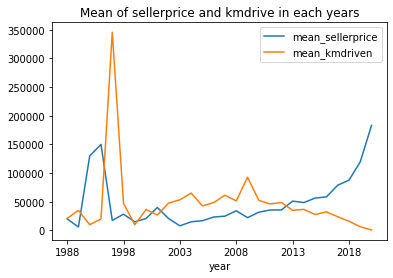

In [54]:
mean_data = Motor.groupby("year").agg(
mean_sellerprice = ("s_price", np.mean),
mean_kmdriven = ("km_driven", np.mean)
)
mean_data.plot.line()
plt.title("Mean of sellerprice and kmdrive in each years")

* Some relationship between `selling price` and `ex_showroom_price`

In [55]:
print("Correlation between selling price and ex_showroom_price\n")
print(Motor[["s_price","ex_showroom_price"]].corr())

Correlation between selling price and ex_showroom_price

                    s_price  ex_showroom_price
s_price            1.000000           0.918583
ex_showroom_price  0.918583           1.000000


In [56]:
no_naMotor = Motor[["s_price","ex_showroom_price"]].dropna()
slope,intercept,*_ = stats.linregress(no_naMotor.ex_showroom_price,no_naMotor.s_price)
print(intercept,slope)

-3010.698402053742 0.7100588453119142


Let's plot scatter with trend line for developing relationship explicitly via graph

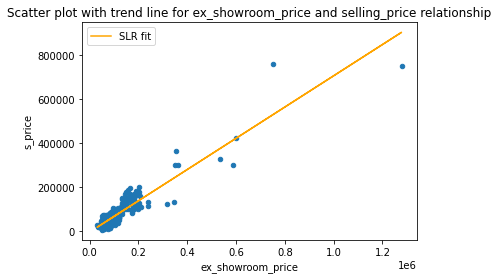

In [57]:
yhat = intercept + slope*no_naMotor.ex_showroom_price
fit = pd.DataFrame(zip(no_naMotor.ex_showroom_price,yhat))
fit.columns = ["x","yhat"]
Motor.plot.scatter(x = "ex_showroom_price",y = "s_price")
plt.plot(no_naMotor.ex_showroom_price,yhat,c = "orange",label = "SLR fit")
plt.title("Scatter plot with trend line for ex_showroom_price and selling_price relationship")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Mean of sellerprice and ex_showroom_price in each years')

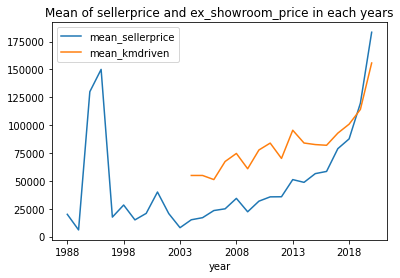

In [58]:
mean_data = Motor.groupby("year").agg(
mean_sellerprice = ("s_price", np.mean),
mean_kmdriven = ("ex_showroom_price", np.mean)
)
mean_data.plot.line()
plt.title("Mean of sellerprice and ex_showroom_price in each years")

In [9]:
print("Standard deviation of selling price, driven kilometer and ex_showroom_price groupby owner and seller type")
print(Motor.drop(["name"],axis = 1).groupby(["owner","s_type"]).std())

Standard deviation of selling price, driven kilometer and ex_showroom_price groupby owner and seller type
                            s_price      km_driven  ex_showroom_price
owner     s_type                                                     
1st owner Dealer       19390.719430   24503.120595       28860.407499
          Individual   51642.736480   45946.135797       54639.511957
2nd owner Dealer        7071.067812   63639.610307                NaN
          Individual   82216.213951   35656.454003      168949.652980
3rd owner Dealer                NaN            NaN                NaN
          Individual   38385.129697   20934.499573       20129.009017
4th owner Dealer                NaN            NaN                NaN
          Individual  183325.757419  492772.513438                NaN


In [10]:
print("Mean, standard deviationa and median of selling price groupby owner and seller type")
pd.crosstab(Motor.owner,Motor.s_type, values = Motor.s_price, aggfunc = ["mean","median","std"])

Mean, standard deviationa and median of selling price groupby owner and seller type


mean                  median                      std  \
s_type      Dealer     Individual   Dealer Individual        Dealer   
owner                                                                 
1st owner  60000.0   60022.913043  61000.0    45000.0  19390.719430   
2nd owner  20000.0   56256.190083  20000.0    35000.0   7071.067812   
3rd owner      NaN   55727.272727      NaN    45000.0           NaN   
4th owner      NaN  118333.333333      NaN    15000.0           NaN   

                          
s_type        Individual  
owner                     
1st owner   51642.736480  
2nd owner   82216.213951  
3rd owner   38385.129697  
4th owner  183325.757419

In [11]:
print("Mean, standard deviationa and median of driven kilometer groupby owner and seller type")
pd.crosstab(Motor.owner,Motor.s_type, values = Motor.km_driven, aggfunc = ["mean","median","std"])

Mean, standard deviationa and median of driven kilometer groupby owner and seller type


mean                  median                      std  \
s_type       Dealer     Individual   Dealer Individual        Dealer   
owner                                                                  
1st owner  25388.25   32848.880435  18925.0    24000.0  24503.120595   
2nd owner  55000.00   39029.305785  55000.0    34000.0  63639.610307   
3rd owner       NaN   33292.181818      NaN    35000.0           NaN   
4th owner       NaN  311500.000000      NaN    48000.0           NaN   

                          
s_type        Individual  
owner                     
1st owner   45946.135797  
2nd owner   35656.454003  
3rd owner   20934.499573  
4th owner  492772.513438

In [12]:
print("Mean, standard deviationa and median of ex_showroom_price groupby owner and seller type")
pd.crosstab(Motor.owner,Motor.s_type, values = Motor.ex_showroom_price, aggfunc = ["mean","median","std"])

Mean, standard deviationa and median of ex_showroom_price groupby owner and seller type


mean                  median                      std  \
s_type      Dealer     Individual   Dealer Individual        Dealer   
owner                                                                 
1st owner  88536.0   84340.157324  85011.0    72532.0  28860.407499   
2nd owner      NaN  112554.651515      NaN    73299.0           NaN   
3rd owner      NaN   64611.000000      NaN    64589.0           NaN   
4th owner      NaN  534000.000000      NaN   534000.0           NaN   

                          
s_type        Individual  
owner                     
1st owner   54639.511957  
2nd owner  168949.652980  
3rd owner   20129.009017  
4th owner            NaN

## Prediction of selling_price

### Using Grid Search Algorithm

Create grid of values for c

In [56]:
c = []
for i in range(40001):
    c.append(30000+i)

Define a function that found which c making RMSE smallest

In [57]:
def lossfuc(c,y):
    n = []
    for m in range(len(c)):
        x = []
        for i in range(len(y)):
            v = (y[i]-c[m])**2
            x.append(v)
        z = np.sqrt(np.sum(x)/len(y))
        n.append(z)
    l =n.index(min(n))
    return c[l]

Implement the function

In [64]:
OPTc_sprice = lossfuc(c,Motor["s_price"])
v = [(i-OPTc_sprice)**2 for i in Motor.s_price]
z = np.sqrt(np.sum(v)/len(v))

In [67]:
OPTc_kmdriven = lossfuc(c,Motor["km_driven"])
v = [(i-OPTc_kmdriven)**2 for i in Motor.km_driven]
x = np.sqrt(np.sum(v)/len(v))

In [69]:
print("Optimal c for s_price is",OPTc_sprice,"Smallest RMSE is", z)
print("Optimal c for kmdriven is",OPTc_kmdriven,"Smallest RMSE is", x)

Optimal c for s_price is 59638 Smallest RMSE is 56277.75212166089
Optimal c for kmdriven is 34360 Smallest RMSE is 51598.81937376337


### Using y and another numeric variable x:

In [73]:
def nvfunc(km):
    yhat = []
    for b0 in range(60000,70000):
        for b1 in range(-100,100):
            yhat.append((b1/100)*km+b0)
    return yhat

In [78]:
yhat10 = nvfunc(10000)
yhat25 = nvfunc(25000)
yhat35 = nvfunc(35000)

In [ ]:
opty10 = lossfuc(yhat10,Motor["s_price"])
opty25 = lossfuc(yhat25,Motor["s_price"])                           
opty35 = lossfuc(yhat35,Motor["s_price"])                      

In [ ]:
print("smallest RMSE is",opty10,"with 10000 kmdriven")
print("smallest RMSE is",opty25,"with 25000 kmdriven")
print("smallest RMSE is",opty35,"with 35000 kmdriven")

### Using a gradient Descent Algorithm

In [ ]:
def DQfunc(y,c,delta):
    diff = (np.sqrt(sum((x-c-delta)**2 for x in y)/len(y))-np.sqrt(sum((x-c)**2 for x in y)/len(y)))/delta
    return diff
cur_c = 50000
delta = 0.001
stepsize = 0.5
num_tol = 0.001
new_c = cur_c - DQfunc(Motor.s_price,cur_c,delta)*stepsize
i = 0
while abs(new_c-cur_c) >= num_tol:
    i = i+1
    cur_c = new_c
    new_c = cur_c - DQfunc(Motor.s_price,cur_c,delta)*stepsize
    if i>1000000:
        break
cur_c =new_c
v = [(i-cur_c)**2 for i in Motor.s_price]
b = np.sqrt(np.sum(v)/len(v))

In [84]:
print("Value of optimal c is",cur_c,"Number of iteration",i,"smallest RMSE",b)

Value of optimal c is 59525.56749890937 Number of iteration 501667 smallest RMSE 56277.86473433619


In [86]:
cur_c = 50000
delta = 0.001
stepsize = 0.5
num_tol = 0.001
new_c = cur_c - DQfunc(Motor.km_driven,cur_c,delta)*stepsize
i = 0
while abs(new_c-cur_c) >= num_tol:
    i = i+1
    cur_c = new_c
    new_c = cur_c - DQfunc(Motor.km_driven,cur_c,delta)*stepsize
    if i>1000000:
        break
cur_c =new_c
v = [(i-cur_c)**2 for i in Motor.km_driven]
q = np.sqrt(np.sum(v)/len(v))

In [87]:
print("Value of optimal c is",cur_c,"Number of iteration",i,"smallest RMSE",q)

Value of optimal c is 34463.03208671088 Number of iteration 520489 smallest RMSE 51598.92257357268


### Using y and another numeric variable

In [122]:
x = [1,2,3]
np.array(x)*2

array([2, 4, 6])

In [119]:
def DQb0func(y,b0,b1,delta0,km):
    newposi = np.sqrt((sum([(b0-delta0-b1*x)**2 for x in y])-sum(km))/len(y))
    original = np.sqrt((sum([(b0-b1*x)**2 for x in y])-sum(km))/len(y))
    increase = newposi - original
    diff = increase/delta0
    return diff
def DQb1func(y,b0,b1,delta1,km):
    newposi = np.sqrt((sum([(x-b0-(b1+delta1)*km)**2 for x in y])-sum(km))/len(y))
    original = np.sqrt((sum([(x-b0-b1*km)**2 for x in y])-sum(km))/len(y))
    increase = newposi - original
    diff = increase/delta0
    return diff

In [13]:
def RMSE(x,y,b0,b1):
    x = np.array(x)
    y = np.array(y)
    x = np.array(x)*b1+b0
    RMSE = np.subtract(y,x)
    RMSE = list(RMSE)
    return RMSE
def dff_b0(x,y,b0,b1,delta0):
    increase = np.sqrt(sum(list((np.array(RMSE(x,y,b0+delta0,b1)) - np.array(RMSE(x,y,b0,b1)))**2))/len(y))
    diff = increase/delta0
    return diff
def dff_b1(x,y,b0,b1,delta1):
    increase = np.sqrt(sum(list((np.array(RMSE(x,y,b0,b1+delta1)) - np.array(RMSE(x,y,b0,b1)))**2))/len(y))
    diff = increase/delta0
    return diff

In [137]:
dff_b0(Motor.km_driven,Motor.s_price,b0,b1,delta0)*stepsizeb0
new_b1 = b1 - dff_b1(Motor.km_driven,Motor.s_price,b0,b1,delta1)*stepsizeb1
new_b1

0.30996113855764557

In [14]:
b0 = 60000
b1 = 0
delta0 = 0.005
delta1 = 0.005
stepsizeb0 = 1
stepsizeb1 = 0.000005
num_tol = 0.001
km = 10000
new_b0 = b0 - dff_b0(Motor.km_driven,Motor.s_price,b0,b1,delta0)*stepsizeb0
new_b1 = b1 - dff_b1(Motor.km_driven,Motor.s_price,b0,b1,delta1)*stepsizeb1
i = 0
while np.sqrt((new_b0-b0)**2+(new_b1-b1)**2) >= num_tol:
    i = i+1
    b0 = new_b0
    b1 = new_b1
    new_b0 = b0 - dff_b0(Motor.km_driven,Motor.s_price,b0,b1,delta0)*stepsizeb0
    new_b1 = b1 - dff_b1(Motor.km_driven,Motor.s_price,b0,b1,delta1)*stepsizeb1
    if i >100000:
        break
    b0 = new_b0
    b1 = new_b1
optb02 = b0
optb12 = b1
print("Optimal b0 and b1 are",optb02,optb12,"Iteration number",i)

Optimal b0 and b1 are 59998.00000000097 -0.6199222771152908 Iteration number 1
